# WeatherPy - *FINAL*

In [205]:
import matplotlib.pyplot as plt
import requests
import pandas as pd
import numpy as np
import json
import scipy.stats as st
from datetime import date
import time
from config import weather_api_key
from config import g_key
from citipy import citipy
import csv

In [206]:
url = url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f'{url}appid={weather_api_key}&units={units}&q='

## Generate Cities List

In [207]:
# Testing citipy nearest_city and country_code
city = citipy.nearest_city(-55.67, 120.2)
city.city_name
city.country_code

'au'

In [208]:
# Create random coordinate dataframe
rand_lat = np.random.uniform(-90,90,1200)
rand_lng = np.random.uniform(-180,180,1200)
lat_lng = pd.DataFrame({'Latitude':rand_lat, 'Longitude':rand_lng})
lat_lng
# rand_lat

,Latitude,Longitude
0,-68.018045,-133.472445
1,19.552703,-111.708182
2,-73.048034,-74.255136
3,-51.150502,79.427454
4,54.984326,9.486466
...,...,...
1195,-85.611710,-113.110037
1196,0.827015,95.328465
1197,12.646226,122.984394
1198,-34.304030,153.414768


In [209]:
cities = []
countries = []

for i in range (0,len(lat_lng['Latitude'])):
    city = citipy.nearest_city(lat_lng['Latitude'][i], lat_lng['Longitude'][i])
    cities.append(city.city_name)
    countries.append(city.country_code)
    
lat_lng['City'] = cities
lat_lng['Country'] = countries

# Count number of cities
len(lat_lng)

1200

In [210]:
lat_lng

,Latitude,Longitude,City,Country
0,-68.018045,-133.472445,rikitea,pf
1,19.552703,-111.708182,cabo san lucas,mx
2,-73.048034,-74.255136,ushuaia,ar
3,-51.150502,79.427454,mahebourg,mu
4,54.984326,9.486466,aabenraa,dk
...,...,...,...,...
1195,-85.611710,-113.110037,punta arenas,cl
1196,0.827015,95.328465,meulaboh,id
1197,12.646226,122.984394,mabiton,ph
1198,-34.304030,153.414768,nelson bay,au


In [211]:
# Check for duplicated cities
# lat_lng['City'].duplicated().value_counts()

lat_lng['City'].value_counts()

# Alternatively, use: lat_lng['City'].nunique()

ushuaia           44
rikitea           39
punta arenas      30
mataura           25
vaini             22
                  ..
bolshoy tsaryn     1
birjand            1
mago               1
rivera             1
labuhan            1
Name: City, Length: 528, dtype: int64

In [212]:
# Drop duplicate cities, but keep first instance 
lat_lng.drop_duplicates(subset='City', keep='first', inplace=True)

In [214]:
# Check if duplicates have dropped off
lat_lng['City'].value_counts()

portland      1
porto belo    1
ormara        1
klyuchi       1
castro        1
             ..
cherskiy      1
ostersund     1
kaminskiy     1
vaini         1
labuhan       1
Name: City, Length: 528, dtype: int64

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [215]:
requests.get('http://api.openweathermap.org/data/2.5/weather?q=london&appid=47e33a210410942f6c73a407a06be6e5')

<Response [200]>

In [216]:
# 1-City Get Test
requests.get(query_url+'london').json()

{'coord': {'lon': -0.1257, 'lat': 51.5085},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 59.45,
  'feels_like': 59.41,
  'temp_min': 57.69,
  'temp_max': 60.76,
  'pressure': 1014,
  'humidity': 92},
 'visibility': 9000,
 'wind': {'speed': 8.05, 'deg': 240},
 'clouds': {'all': 99},
 'dt': 1628545408,
 'sys': {'type': 2,
  'id': 2019646,
  'country': 'GB',
  'sunrise': 1628483804,
  'sunset': 1628537722},
 'timezone': 3600,
 'id': 2643743,
 'name': 'London',
 'cod': 200}

In [21]:
# Create city data list to append to
city_data = []

# Print initial request
print('Beginning Data Retrieval')
print('-----------------------------')

# Create record counter
record_count = 1

# Loop through each city in lat_lng list
# if limited, stall code at each iteration (with time.sleep)
for x in lat_lng['City'][:]:
    try:
        response = requests.get(query_url+x).json()
        
        city = response['name']
        lon = response['coord']['lon']
        lat = response['coord']['lat']
        temp_max = response['main']['temp_max']
        humidity = response['main']['humidity']
        cloudiness = response['clouds']['all']
        wind_speed = response['wind']['speed']
        country = response['sys']['country']
        date = response['dt']
        
        city_data.append({'City':city,
                          'Longitude':lon,
                          'Latitude':lat,
                          'Max Temperature':temp_max,
                          'Humidity':humidity,
                          'Cloudiness':cloudiness,
                          'Wind Speed':wind_speed,
                          'Country':country,
                          'Date':date})
        
        # Indicate city has been loaded
        print("Processed Record %s | %s" % (record_count, city))
        
        # Add 1 to record count
        record_count = record_count + 1
        
    # If error occurs, skip city
    except:
        print("City not found. Skipping...")
        pass

# Indicate all data has been loaded
print('-----------------------------')
print('Data Retrieval Complete')
print('-----------------------------')

Beginning Data Retrieval
-----------------------------
Processed Record 1 | Meadow Lake
Processed Record 2 | Jamestown
Processed Record 3 | Simao
Processed Record 4 | Port Alfred
Processed Record 5 | Saint-Philippe
Processed Record 6 | Upernavik
Processed Record 7 | Saint-Philippe
Processed Record 8 | Rikitea
City not found. Skipping...
City not found. Skipping...
Processed Record 9 | Codrington
Processed Record 10 | Ngunguru
Processed Record 11 | Sinnamary
Processed Record 12 | Pacific Grove
Processed Record 13 | Shingū
Processed Record 14 | Bredasdorp
Processed Record 15 | Bashtanka
Processed Record 16 | Fortuna
Processed Record 17 | Lavrentiya
Processed Record 18 | Agadez
Processed Record 19 | Mataura
Processed Record 20 | Teahupoo
Processed Record 21 | Rikitea
Processed Record 22 | ‘Ewa Beach
Processed Record 23 | Hithadhoo
Processed Record 24 | Iqaluit
Processed Record 25 | Talnakh
Processed Record 26 | New Norfolk
Processed Record 27 | Inuvik
Processed Record 28 | Erenhot
Process

Processed Record 243 | Hay River
Processed Record 244 | Ossora
Processed Record 245 | Bemidji
City not found. Skipping...
Processed Record 246 | Dubovyy Umët
Processed Record 247 | Atuona
Processed Record 248 | Tuktoyaktuk
Processed Record 249 | Atuona
Processed Record 250 | Arraial do Cabo
Processed Record 251 | Avarua
Processed Record 252 | Dawson Creek
Processed Record 253 | Jacareacanga
Processed Record 254 | Punta Arenas
Processed Record 255 | Jamestown
City not found. Skipping...
Processed Record 256 | Carnarvon
Processed Record 257 | Warwick
Processed Record 258 | Codrington
Processed Record 259 | Dunedin
Processed Record 260 | Thompson
Processed Record 261 | Thompson
Processed Record 262 | Paamiut
Processed Record 263 | Klaksvík
Processed Record 264 | Muros
Processed Record 265 | Fréjus
Processed Record 266 | Likasi
Processed Record 267 | Aklavik
Processed Record 268 | Port Alfred
Processed Record 269 | Rikitea
Processed Record 270 | Ambāgarh Chauki
Processed Record 271 | Bengk

Processed Record 478 | Atar
Processed Record 479 | Butaritari
Processed Record 480 | Bluff
Processed Record 481 | Wanning
Processed Record 482 | São João da Barra
Processed Record 483 | Nouakchott
Processed Record 484 | Zhigalovo
Processed Record 485 | Jamestown
Processed Record 486 | Soc Trang
Processed Record 487 | Rikitea
City not found. Skipping...
Processed Record 488 | Esperance
Processed Record 489 | Ushuaia
Processed Record 490 | Mahébourg
Processed Record 491 | Praia da Vitória
Processed Record 492 | Te Anau
Processed Record 493 | San Felipe
Processed Record 494 | Hobart
Processed Record 495 | Kumasi
Processed Record 496 | Vaini
Processed Record 497 | Tuktoyaktuk
Processed Record 498 | Esperance
Processed Record 499 | Mataura
Processed Record 500 | Rikitea
Processed Record 501 | Bua Yai
Processed Record 502 | Broome
Processed Record 503 | Jamestown
Processed Record 504 | Butaritari
City not found. Skipping...
Processed Record 505 | Bengkulu
Processed Record 506 | Shingū
Proces

In [23]:
# Test the output of above
city_data

[{'City': 'Meadow Lake',
  'Longitude': -106.5436,
  'Latitude': 34.8014,
  'Max Temperature': 93.22,
  'Humidity': 20,
  'Cloudiness': 42,
  'Wind Speed': 6.31,
  'Country': 'US',
  'Date': 1628534576},
 {'City': 'Jamestown',
  'Longitude': -79.2353,
  'Latitude': 42.097,
  'Max Temperature': 89.02,
  'Humidity': 52,
  'Cloudiness': 20,
  'Wind Speed': 8.99,
  'Country': 'US',
  'Date': 1628534498},
 {'City': 'Simao',
  'Longitude': 100.9748,
  'Latitude': 22.7886,
  'Max Temperature': 67.23,
  'Humidity': 99,
  'Cloudiness': 100,
  'Wind Speed': 0.34,
  'Country': 'CN',
  'Date': 1628534992},
 {'City': 'Port Alfred',
  'Longitude': 26.891,
  'Latitude': -33.5906,
  'Max Temperature': 57.51,
  'Humidity': 70,
  'Cloudiness': 100,
  'Wind Speed': 20.09,
  'Country': 'ZA',
  'Date': 1628534688},
 {'City': 'Saint-Philippe',
  'Longitude': 55.7679,
  'Latitude': -21.3585,
  'Max Temperature': 69.39,
  'Humidity': 85,
  'Cloudiness': 95,
  'Wind Speed': 1.05,
  'Country': 'RE',
  'Date': 1

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [53]:
# Export the city data into a .csv.

# Set keys
keys = city_data[0].keys()

# Use csv.DictWriter to write CSV
city_data_csv = open("../output_data/city_data.csv", "w")
dict_writer = csv.DictWriter(city_data_csv, keys)
dict_writer.writeheader()
dict_writer.writerows(city_data)
city_data_csv.close()

In [34]:
# Display the DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Longitude,Latitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Meadow Lake,-106.5436,34.8014,93.22,20,42,6.31,US,1628534576
1,Jamestown,-79.2353,42.0970,89.02,52,20,8.99,US,1628534498
2,Simao,100.9748,22.7886,67.23,99,100,0.34,CN,1628534992
3,Port Alfred,26.8910,-33.5906,57.51,70,100,20.09,ZA,1628534688
4,Saint-Philippe,55.7679,-21.3585,69.39,85,95,1.05,RE,1628534580
...,...,...,...,...,...,...,...,...,...
554,Isangel,169.2667,-19.5500,66.31,82,40,4.61,VU,1628534786
555,Punta Arenas,-70.9167,-53.1500,46.51,66,40,23.02,CL,1628534656
556,Mataura,168.8643,-46.1927,40.48,97,70,4.54,NZ,1628534546
557,Hermanus,19.2345,-34.4187,51.91,68,5,4.09,ZA,1628534682


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [38]:
city_data_df.describe()

,Longitude,Latitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Date
count,559.000000,559.000000,559.00000,559.000000,559.000000,559.000000,5.590000e+02
mean,-2.626628,5.025265,65.87059,71.491950,55.726297,9.620197,1.628535e+09
std,104.036649,40.296657,16.02096,18.967134,38.070655,6.672352,8.851691e+01
min,-175.200000,-54.800000,37.42000,7.000000,0.000000,0.000000,1.628534e+09
25%,-76.216700,-33.411950,50.88500,62.000000,19.000000,4.350000,1.628535e+09
50%,-13.862700,-1.267500,69.39000,73.000000,61.000000,8.790000,1.628535e+09
75%,100.393550,42.097000,78.73000,86.000000,93.000000,13.380000,1.628535e+09
max,174.500000,77.484000,101.34000,100.000000,100.000000,34.580000,1.628535e+09


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

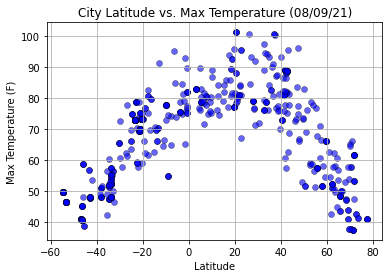

In [96]:
# Personalize scatterplot
plt.scatter(city_data_df['Latitude'], 
            city_data_df['Max Temperature'], 
            color = "blue", 
            marker = "o", 
            alpha = 0.6, 
            linewidths = .5, 
            edgecolors = "black")

# Create labels
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Latitude vs Temperature.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

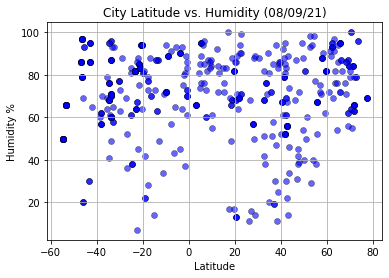

In [97]:
# Personalize scatterplot
plt.scatter(city_data_df['Latitude'], 
            city_data_df['Humidity'], 
            color = "blue", 
            marker = "o", 
            alpha = 0.6, 
            linewidths = .5, 
            edgecolors = "black")

# Create labels
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Latitude vs Humidity.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

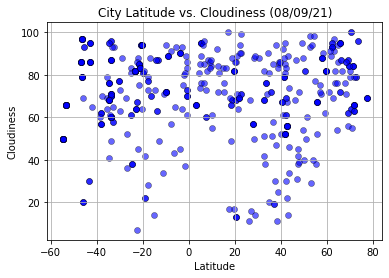

In [98]:
# Personalize scatterplot
plt.scatter(city_data_df['Latitude'], 
            city_data_df['Humidity'], 
            color = "blue", 
            marker = "o", 
            alpha = 0.6, 
            linewidths = .5, 
            edgecolors = "black")

# Create labels
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Latitude vs Cloudiness.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

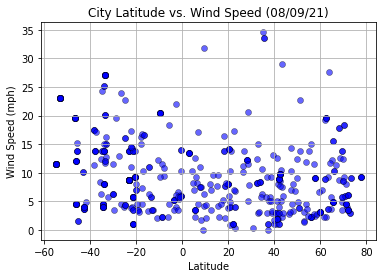

In [99]:
# Personalize scatterplot
plt.scatter(city_data_df['Latitude'], 
            city_data_df['Wind Speed'], 
            color = "blue", 
            marker = "o", 
            alpha = 0.6, 
            linewidths = .5, 
            edgecolors = "black")

# Create labels
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Latitude vs Wind Speed.png")

# Show plot
plt.show()

## Linear Regression

In [66]:
# Break city_data_df into Northern and Southern Hemispheres
n_hemi = city_data_df.loc[city_data_df["Latitude"] >=0]
s_hemi = city_data_df.loc[city_data_df["Latitude"] <0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is -0.7438578605785451


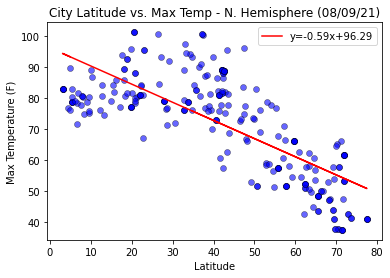

In [117]:
# Use scipy linregress to get regression statistics
x = n_hemi["Latitude"]
y = n_hemi["Max Temperature"]

# Set linear regression values
slope, intercept, r_value, p_value, std_err = st.linregress(x, y)

# Setup Graph
plt.title("City Latitude vs. Max Temp - N. Hemisphere (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.scatter(x, y, 
            color = "blue", 
            marker = "o", 
            alpha = 0.6, 
            linewidths = .5, 
            edgecolors = "black")

# Create line and plot with equation
line = slope*x+intercept
plt.plot(x, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))

plt.legend(fontsize=10)

# Save figure
plt.savefig("../output_data/N. Hemisphere - Latitude vs Max Temp - Linear Regression.png")

# Print r-value
print(f'The r value is {r_value}')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is 0.8511632177938564


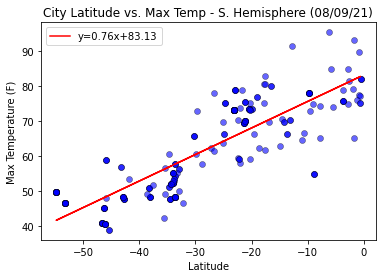

In [118]:
# Use scipy linregress to get regression statistics
x = s_hemi["Latitude"]
y = s_hemi["Max Temperature"]

# Set linear regression values
slope, intercept, r_value, p_value, std_err = st.linregress(x, y)

# Setup Graph
plt.title("City Latitude vs. Max Temp - S. Hemisphere (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.scatter(x, y, 
            color = "blue", 
            marker = "o", 
            alpha = 0.6, 
            linewidths = .5, 
            edgecolors = "black")

# Create line and plot with equation
line = slope*x+intercept
plt.plot(x, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))

plt.legend(fontsize=10)

# Save figure
plt.savefig("../output_data/S. Hemisphere - Latitude vs Max Temp - Linear Regression.png")

# Print r-value
print(f'The r value is {r_value}')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is 0.10826632057640444


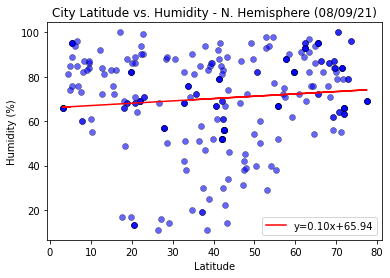

In [122]:
# Use scipy linregress to get regression statistics
x = n_hemi["Latitude"]
y = n_hemi["Humidity"]

# Set linear regression values
slope, intercept, r_value, p_value, std_err = st.linregress(x, y)

# Setup Graph
plt.title("City Latitude vs. Humidity - N. Hemisphere (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.scatter(x, y, 
            color = "blue", 
            marker = "o", 
            alpha = 0.6, 
            linewidths = .5, 
            edgecolors = "black")

# Create line and plot with equation
line = slope*x+intercept
plt.plot(x, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))

plt.legend(fontsize=10)

# Save figure
plt.savefig("../output_data/N. Hemisphere - Latitude vs Humidity - Linear Regression.png")

# Print r-value
print(f'The r value is {r_value}')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is 0.14022055090774174


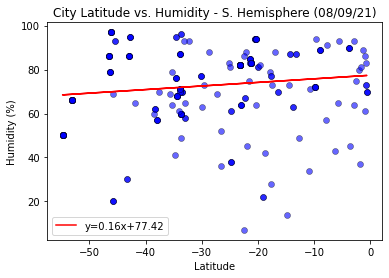

In [121]:
# Use scipy linregress to get regression statistics
x = s_hemi["Latitude"]
y = s_hemi["Humidity"]

# Set linear regression values
slope, intercept, r_value, p_value, std_err = st.linregress(x, y)

# Setup Graph
plt.title("City Latitude vs. Humidity - S. Hemisphere (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.scatter(x, y, 
            color = "blue", 
            marker = "o", 
            alpha = 0.6, 
            linewidths = .5, 
            edgecolors = "black")

# Create line and plot with equation
line = slope*x+intercept
plt.plot(x, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))

plt.legend(fontsize=10)

# Save figure
plt.savefig("../output_data/S. Hemisphere - Latitude vs Humidity - Linear Regression.png")

# Print r-value
print(f'The r value is {r_value}')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is 0.2714134000906715


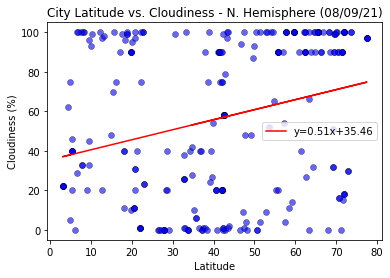

In [123]:
# Use scipy linregress to get regression statistics
x = n_hemi["Latitude"]
y = n_hemi["Cloudiness"]

# Set linear regression values
slope, intercept, r_value, p_value, std_err = st.linregress(x, y)

# Setup Graph
plt.title("City Latitude vs. Cloudiness - N. Hemisphere (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.scatter(x, y, 
            color = "blue", 
            marker = "o", 
            alpha = 0.6, 
            linewidths = .5, 
            edgecolors = "black")

# Create line and plot with equation
line = slope*x+intercept
plt.plot(x, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))

plt.legend(fontsize=10)

# Save figure
plt.savefig("../output_data/N. Hemisphere - Latitude vs Cloudiness - Linear Regression.png")

# Print r-value
print(f'The r value is {r_value}')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is 0.14472948013758305


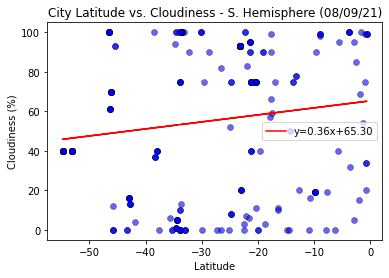

In [124]:
# Use scipy linregress to get regression statistics
x = s_hemi["Latitude"]
y = s_hemi["Cloudiness"]

# Set linear regression values
slope, intercept, r_value, p_value, std_err = st.linregress(x, y)

# Setup Graph
plt.title("City Latitude vs. Cloudiness - S. Hemisphere (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.scatter(x, y, 
            color = "blue", 
            marker = "o", 
            alpha = 0.6, 
            linewidths = .5, 
            edgecolors = "black")

# Create line and plot with equation
line = slope*x+intercept
plt.plot(x, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))

plt.legend(fontsize=10)

# Save figure
plt.savefig("../output_data/S. Hemisphere - Latitude vs Cloudiness - Linear Regression.png")

# Print r-value
print(f'The r value is {r_value}')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
# Use scipy linregress to get regression statistics
x = n_hemi["Latitude"]
y = n_hemi["Wind Speed"]

# Set linear regression values
slope, intercept, r_value, p_value, std_err = st.linregress(x, y)

# Setup Graph
plt.title("City Latitude vs. Wind Speed - N. Hemisphere (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.scatter(x, y, 
            color = "blue", 
            marker = "o", 
            alpha = 0.6, 
            linewidths = .5, 
            edgecolors = "black")

# Create line and plot with equation
line = slope*x+intercept
plt.plot(x, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))

plt.legend(fontsize=10)

# Save figure
plt.savefig("../output_data/N. Hemisphere - Latitude vs Wind Speed - Linear Regression.png")

# Print r-value
print(f'The r value is {r_value}')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is -0.2845575241403428


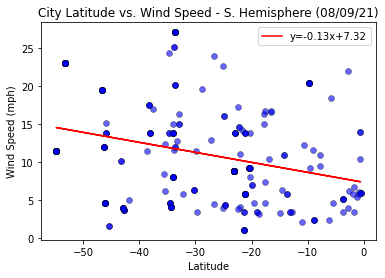

In [125]:
# Use scipy linregress to get regression statistics
x = s_hemi["Latitude"]
y = s_hemi["Wind Speed"]

# Set linear regression values
slope, intercept, r_value, p_value, std_err = st.linregress(x, y)

# Setup Graph
plt.title("City Latitude vs. Wind Speed - S. Hemisphere (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.scatter(x, y, 
            color = "blue", 
            marker = "o", 
            alpha = 0.6, 
            linewidths = .5, 
            edgecolors = "black")

# Create line and plot with equation
line = slope*x+intercept
plt.plot(x, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))

plt.legend(fontsize=10)

# Save figure
plt.savefig("../output_data/S. Hemisphere - Latitude vs Wind Speed - Linear Regression.png")

# Print r-value
print(f'The r value is {r_value}')